# Homework no.3 Machine Learning
**Stu. Name**: Mohammad Amin Dadgar 

**Stu. Id**: 4003624016

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Q1

In [2]:
## read images of 0 to 4 chracters 
image_no0 = plt.imread('datasets/usps_0.jpg')
image_no1 = plt.imread('datasets/usps_1.jpg')
image_no2 = plt.imread('datasets/usps_2.jpg')
image_no3 = plt.imread('datasets/usps_3.jpg')
image_no4 = plt.imread('datasets/usps_4.jpg')

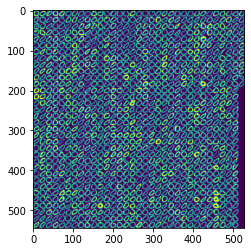

In [3]:
## show one of the images
plt.imshow(image_no0)
plt.show()

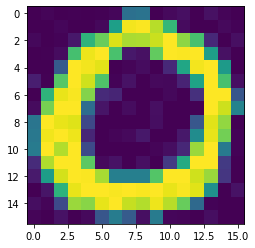

In [4]:
## take a look at one of the characters
plt.imshow(image_no0[:16, :16])

In [5]:
## open all images file 
img_numbers1 = plt.imread('datasets/usps_0.jpg')
img_numbers2 = plt.imread('datasets/usps_1.jpg')
img_numbers3 = plt.imread('datasets/usps_2.jpg')
img_numbers4 = plt.imread('datasets/usps_3.jpg')
img_numbers5 = plt.imread('datasets/usps_4.jpg')

## iterate over each images and get the valus of them
images_arr = [img_numbers1, img_numbers2, img_numbers3, img_numbers4, img_numbers5]

## each image is 16 by 16 pixels
IMAGE_SIZE_X = 16
IMAGE_SIZE_Y = 16

## feature space size is the multiplication of width and height
FEATURE_SPACE_SIZE = IMAGE_SIZE_X * IMAGE_SIZE_Y

## create pandas columns
cols = []
for i in range(0, FEATURE_SPACE_SIZE):
    cols.append(f"feature_{i}")
## there must be a label for each image
cols.append('label')

In [6]:
dataset_df = pd.DataFrame(columns=cols)

images = []
## each label for hand writed images is the index of the array
for label, image in enumerate(images_arr):
    images.append([])
    ## x of each image
    ## iterate over image columns
    for y_idx in np.arange(0, image.shape[1] - IMAGE_SIZE_Y + 1, IMAGE_SIZE_Y):
        ## iterate over image rows
        for x_idx in np.arange(0, image.shape[0] - IMAGE_SIZE_X + 1, IMAGE_SIZE_X):
            ## add images using the labels
            img = np.array(image[x_idx: x_idx + IMAGE_SIZE_X, y_idx: y_idx + IMAGE_SIZE_Y])
            images[label].append( img )

            df = pd.DataFrame(columns=cols)
            img = img.flatten()
            img = np.append(img, label) 
            img_series = pd.Series(img, index=cols)
            df = df.append(img_series, ignore_index=True)
 
            dataset_df = dataset_df.append(df, ignore_index=True)  

In [7]:
## save the images dataset into a csv file
dataset_df.to_csv('datasets/usps_images.csv', index=False)

Now we can see each images saved in arrays

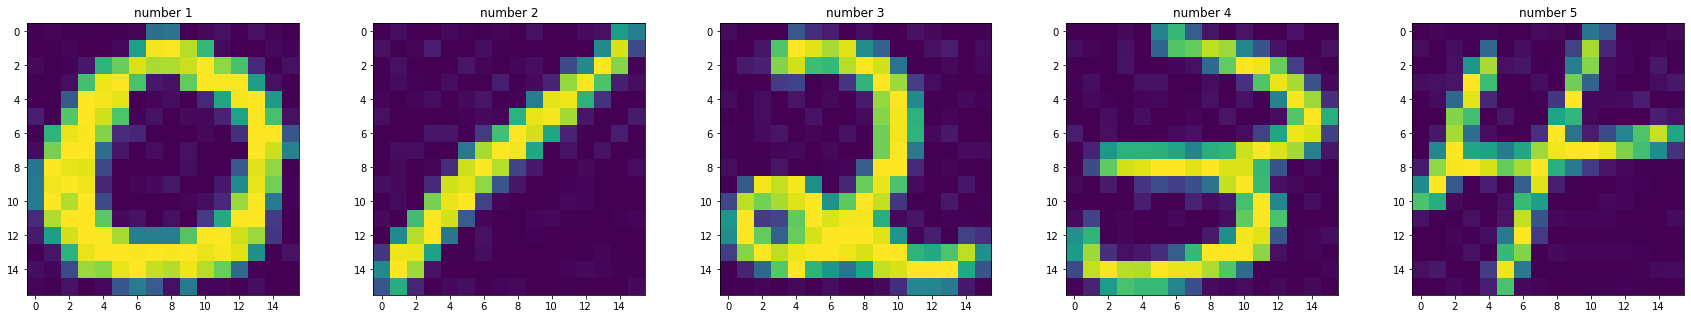

In [8]:
fig, axes = plt.subplots(1,5, figsize=(30,5))
axes[0].imshow(images[0][0])
axes[0].set_title('number 1')

axes[1].imshow(images[1][0])
axes[1].set_title('number 2')

axes[2].imshow(images[2][0])
axes[2].set_title('number 3')

axes[3].imshow(images[3][0])
axes[3].set_title('number 4')

axes[4].imshow(images[4][0])
axes[4].set_title('number 5')

plt.show()

In [5]:
## if the data was available start from here

dataset_df = pd.read_csv('datasets/usps_images.csv')
dataset_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,label
0,0,3,0,1,0,1,4,94,97,0,...,73,10,106,4,3,0,9,0,0,0
1,4,0,0,5,0,10,1,0,1,24,...,41,38,0,0,0,0,16,0,5,0
2,0,12,0,3,5,0,0,3,0,47,...,128,116,51,17,2,0,8,5,0,0
3,8,0,0,3,0,0,0,0,76,123,...,173,89,24,7,0,13,0,9,2,0
4,0,14,0,4,7,0,8,6,5,0,...,1,9,0,6,0,0,0,10,0,0


# Q2
Apply Naive Bayes model on dataset. Divide dataset into test and train 10 times randomly and train the model.

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset_df[dataset_df.columns[:-1]], 
                                                    dataset_df['label'],
                                                    test_size=0.2,
                                                    random_state=123)

In [7]:
## using the codes we've written previously in Homework no.2

def probability_normal_distribution(X, mu, sigma):
    """
    The probability value for normal distribution function
    
    Parameters:
    ------------
    x : array_like
        the input data
    mu : float
        the mean value given
    sigma : float
        the variance given 
        
    Returns:
    --------
    probability : float
        the probability value for the x input values 
    """
    ## we've divided the equation in two parts
    p1 = 1 / (np.sqrt(np.pi * 2) * sigma)
    p2 = np.exp(-0.5 * ((X-mu) / sigma)**2 )
    
    probability = p1 * p2
    
    return probability
    
def find_MLE_Normal_distro(X):
    """
    the maximum likelihood estimation for parameters of normal distribution
    the parameters for normal distribution is covariance matrix and mean vector
    
    Parameters:
    ------------
    X : array_like
        the X input data vectors
    
    Returns:
    ---------
    mu : array_like
        the means vector
    variance : matrix_like
        the matrix representing the covariance

    """
    X = np.array(X)
    
    mu = (1 / len(X)) * np.sum(X)
    
    ## some changes was made to the ML estimation of variance
    ## because of dataset shape
    variance = np.sqrt((1 / len(X)) * np.sum((X - mu)**2))    
    
    return mu, variance

## divide the dataset into 0 and 1 labels
def estimate_MLE_NB(X, Y, features_arr):
    """
    estimate the Maximum likelihood parameters for naive bayes method
    in detail: in naive bayes we have a parameter for each dimension and each class

    Parameters:
    ------------
    X : array_like
        the input data (a pandas dataframe is prefered)
    Y : array_like
        the labels for each `X` inputs
    features : array_like
        the string array for the name of each label in training data (dimensions)

    Returns:
    --------
    MLE_estimates : dictionary 
        the estimated parameters as a dictionary
    """
    ## dictionary of maximum likelihood estimations
    MLE_estimates = {}
    for feature in features_arr:
        for label in [0, 1, 2, 3, 4]:
            mu, var = find_MLE_Normal_distro(X[Y == label][feature])
            ## each feature of class estimation
            MLE_estimates[f'{feature},{label}'] = [mu, var]
    return MLE_estimates

In [8]:
mle_estimates = estimate_MLE_NB(X_train, Y_train, X_train.columns)

In [9]:
## for each feature and each class there is a mean and variance
len(mle_estimates)

1280

In [42]:
def predict_NB(X, MLE_estimations, features_arr):
    """
    predict the class Using Naive bayes algorithm
    
    Parameters:
    ------------
    X : pandas dataframe
        Input data, `X` and `Y` should be the features
    MLE_estimations : dictionary
        Maximum likelihood estimations corresponding to each dimension and class as a dictionary with keys like `X,0`
        meaning X as first feature and 0 as first class 
        
    Returns:
    ---------
    prediction : array_like
        the array representing the probability of each class for data
    """
    ## the predicted value for each data
    prediction = []
    for idx in range(len(X)):
        ## initialize Class probability array
        class_p_arr = []
        for i in [0, 1, 2, 3, 4]:
            ## multiply probability for each dimension
            p = 1
            for feature in features_arr:
                mu, var = MLE_estimations[f'{feature},{i}']
                ## multiplying probabilities with 500 to avoid underflow
                class_prob = probability_normal_distribution(X.iloc[idx][feature],mu, var) * 500
                p = p * class_prob
            class_p_arr.append(p)

        ## save each class probability of each data
        prediction.append(class_p_arr)
    
    ## for ease of use convert to numpy
    prediction = np.array(prediction)
    return prediction

In [43]:
test_NB_results = predict_NB(X_test, mle_estimates, X_test.columns)

In [47]:
NB_test_class_pred = np.argmax(test_NB_results, axis=1)

In [52]:
NB_test_pred_confusion_mat = confusion_matrix(Y_test, NB_test_class_pred)
NB_test_pred_confusion_mat

array([[208,   7,   6,   2,   7],
       [  0, 192,  15,   2,   8],
       [  3,   7, 219,   3,   6],
       [  2,  10,  18, 178,   4],
       [  1,  16,   5,   0, 203]])

In [55]:
## calculate the accuracy
acc = 0
for i in range(len(NB_test_pred_confusion_mat)):
    acc += NB_test_pred_confusion_mat[i, i]

print(f'accuracy: {(acc / np.sum(NB_test_pred_confusion_mat))* 100}')

accuracy: 89.12655971479501


# Q3: TODO

We've written the QDA in Homework no.2 So we've copied the previous codes.

In [ ]:
class QDA():
    """
    Quadratic Discriminant Analysis Class
    """
    def __init__(self):
        self.hyperparameters = None
    
    __
    def predict(self, X):
        """
        Predict the output for the X input
        
        Parameters:
        ------------
        X : array_like
            The data to be appended
        """
        mu0 = self.mu0
        mu1 = self.mu1
        sigma0 = self.sigma0
        sigma1 = self.sigma1
        
        ## check if the model is not learned and the parameters is updated
        ## checking one parameter is enough 
        ## because we are assigning a value to all in learning phase 
        if len(sigma0) == 0:
            raise "Error! First fit the model on a dataset then try to predict the values!"
        


        ## Find the probabilities for class 0
        ## save them in an array for furthur comparisons
        prediction = []
        for i in range(len(X)):
            ## Find the predicted Class of each data in class 0
            P_Class0 = self.__probability_multivariate_normal_distribution(X.iloc[i]
                                                             ,mu0, sigma0)

            P_Class1 = self.__probability_multivariate_normal_distribution(X.iloc[i]
                                                             ,mu1, sigma1)
            ## Compare and set the class to highest probability
            P = P_Class1 >= P_Class0

            ## Append the number of Class
            prediction.append(int(P))
        
        return prediction
    def fit(self, X):
        """
        Learning the parameters of the model (Binary Classification model!)
        
        Parameters:
        -----------
        X : array_like (pandas dataframe is preferred)
            the input values to be learned, With outputs as label
        # Y : array_like
        #     the label for the data (The binary classification task is here)
        """
        ## we need to find the mean and covariance of each class

        features_arr = X.columns[:-1]

        ## divide into class 0 and class 1
        train_ds_C0 = X[X.label == 0]
        train_ds_C1 = X[X.label == 1]

        train_ds_C0_X = train_ds_C0[features_arr]


        train_ds_C1_X = train_ds_C1[features_arr]

        mu0, sigma0 = self.__find_MLE_Normal_distro(train_ds_C0_X.T)
        mu1, sigma1 = self.__find_MLE_Normal_distro(train_ds_C1_X.T)
        
        ## Save the parameters of the model
        self.mu0 = mu0
        self.mu1 = mu1
        self.sigma0 = sigma0
        self.sigma1 = sigma1
            
    def __probability_multivariate_normal_distribution(self, X, mu, sigma):
        """
        The probability value for multivariate normal distribution function

        Parameters:
        ------------
        x : array_like
            the input data
        mu : array_like
            the means vector
        sigma : matrix_like
            the matrix representing the covariance

        Returns:
        --------
        probability : float
            the probability value for the x input values 
        """
        dimension = len(mu)

        ## divide the formula into 2 parts
        p1 = 1 / np.sqrt(((2*np.pi)**dimension) * np.linalg.det(sigma))

        ## some changes was made to the equation
        ## because of dataset shape
        p2 = np.exp(-1/2 * (np.dot(X-mu, np.linalg.inv(sigma) @ (X-mu).T)))


        probability = p1 * p2

        return probability

    def __find_MLE_Normal_distro(self, X):
        """
        the maximum likelihood estimation for parameters of multivatiate normal distribution
        the parameters for normal distribution is covariance matrix and mean vector

        Parameters:
        ------------
        X : array_like
            the X input data vectors

        Returns:
        ---------
        mu : array_like
            the means vector
        covariance : matrix_like
            the matrix representing the covariance

        """

        mu = (1 / len(X.T)) * np.sum(X, axis=1)

        ## some changes was made to the ML estimation of covariance
        ## because of dataset shape
        covariance = (1 / len(X.T)) * ((X.T-mu).T @ (X.T-mu))    

        return mu, covariance
   